# 1. Lotka-Volterra Predator-Prey Model

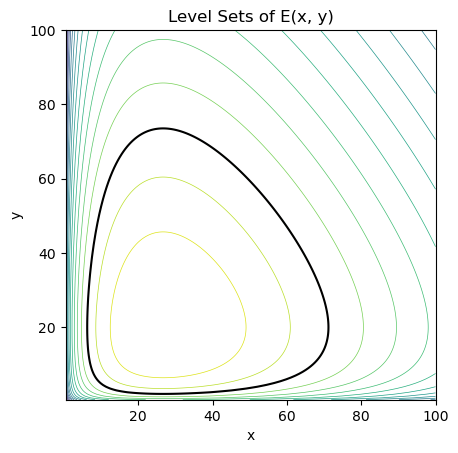

In [198]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.4 #1.1
b = 0.8 #1.1
p = 0.02 #0.1
q = 0.03 #0.01

E = lambda x,y: a*np.log(y) - p*y + b*np.log(x) - q*x;

# Define the range of x and y values for the plot
x_min, x_max = 0.5, 100  # Adjust as needed
y_min, y_max = 0.5, 100  # Adjust as needed
x = np.linspace(x_min, x_max, 200)  # Increased density for smoother levels
y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(x, y)  # Create the meshgrid

# Calculate the function values on the grid
Z = E(X, Y)

# Choose the level values to plot.  You can specify them directly,
# or use a range with a certain number of levels.

# Option 1: Specify levels directly
# levels = [0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]  # Example levels

# Option 2: Use a range of levels (more common)
num_levels = 20  # Number of levels to plot
levels = np.linspace(Z.min(), Z.max(), num_levels)  # Evenly spaced levels

# Or, for logarithmic spacing (useful if the function varies greatly)
# levels = np.logspace(np.log10(Z.min()+1e-6), np.log10(Z.max()), num_levels) # avoid log(0)


# Plot the level sets (contour lines)
CS = plt.contour(X, Y, Z, levels=levels, linewidths=0.5)  

plt.contour(X, Y, Z, levels=[2.075], linewidths=1.5, colors='black') 

# Optional: Add labels to the contour lines (might be cluttered if too many levels)
# plt.clabel(CS, inline=True, fontsize=8)

# Optional: Add a filled contour plot to show the regions between levels
# plt.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.5) # viridis, plasma, magma, inferno, cividis

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Level Sets of E(x, y)')

# Set equal aspect ratio for x and y axes (important for level sets to look correct)
plt.gca().set_aspect('equal')

# Show the plot
# plt.colorbar(label='C') # Add a colorbar for the filled contour
# plt.grid(True, alpha=0.3) # Add a light grid
# plt.show()

# plt.savefig('LV-levelsets.png')

## 2. Lotka-Volterra Model with Logistic Prey

Set up the parameters and initial conditions

In [187]:
# Initial conditions
prey_initial = 2
predator_initial = 2
y0 = [prey_initial, predator_initial]

# Time span and step size
t_start = 0
t_end = 50
dt = 0.001

a = 1; b = 1; p = 1; q = 1;

Run the original Lotka-Volterra again to sketch a periodic solution for the original Lotka-Volterra model

In [197]:

# E = lambda x,y: a*np.log(y) - p*y + b*np.log(x) - q*x;

# Define the range of x and y values for the plot
x_min, x_max = 0, 3  # Adjust as needed
y_min, y_max = 0, 3  # Adjust as needed
x = np.linspace(x_min, x_max, 50)  # Increased density for smoother levels
y = np.linspace(y_min, y_max, 50)
x = x[1:]  # remove the 0 because it's not in the domain of E
y = y[1:]  # remove the 0 because it's not in the domain of E
X, Y = np.meshgrid(x, y)  # Create the meshgrid

# Calculate the function values on the grid
Z = E(X, Y)


Run the modified Lotka-Volterra and sketch a few solutions along with one periodic solution form the original model.

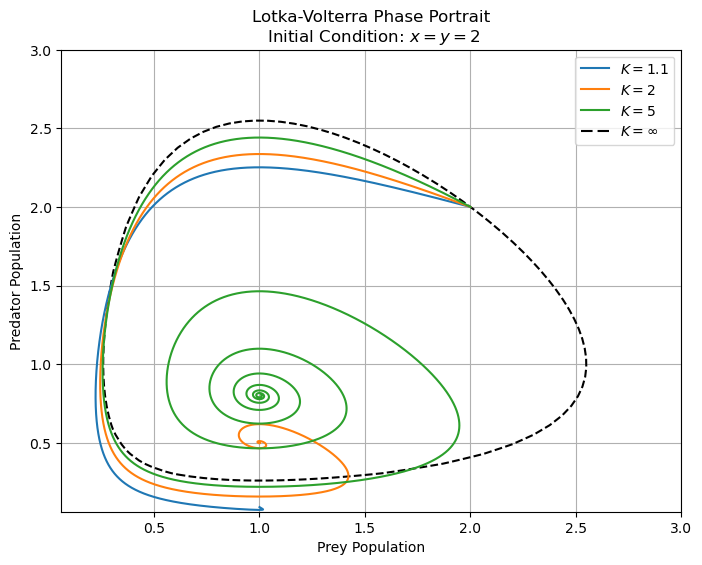

In [196]:
import numpy as np
import matplotlib.pyplot as plt


def lotka_volterra(y, t, K, a, b, p, q):  # Correct argument order
    """Lotka-Volterra equations with a logistic prey wit hcarrying capacity K."""
    prey, predator = y
    d_prey = a * prey * (1 - prey / K) - p * prey * predator
    d_predator = q * prey * predator - b * predator
    return np.array([d_prey, d_predator])


def euler_method(f, y0, t_span, dt, *args):
    """Euler's method."""
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + dt, dt)
    n_steps = len(t)
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0  # Initialize the first value

    for i in range(n_steps - 1):
        y[i+1] = y[i] + dt * f(y[i], t[i], *args)  # Correct function call
    return t, y



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Prey Population')
ax.set_ylabel('Predator Population')
ax.set_title('Lotka-Volterra Phase Portrait\n Initial Condition: $x=y=2$')
ax.grid(True)


# Sketch the graph of the reference periodic solution
CS = ax.contour(X, Y, Z, levels=[C], linewidths=1.5, colors='black') 
handels_CS, labels = CS.legend_elements()


# Sketch solutions for some values of K

K = [1.1, 2, 5]
handles_P=[]
labels = []

for i in range(len(K)):
    # Solve using Euler's method
    t, y = euler_method(lotka_volterra, y0, (t_start, t_end), dt, K[i], a, b , p, q) #Pass the parameters
    
    # Extract populations
    prey = y[:, 0]
    predator = y[:, 1]

    # Phase Portrait
    P = ax.plot(prey, predator)  # Predator vs. Prey
    handles_P += P
    labels.append('$K=' + str(K[i])+'$')

handles_CS, l = CS.legend_elements()
labels.append(r'$K=\infty$')

plt.legend(handles_P+handles_CS,labels);

# plt.savefig('LV-logistic.png')
plt.show()